## Implementasi Klasifikasi Naïve Bayes Support Vector Machine (SVM)

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #import dataset dari gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wul = pd.read_csv('/content/drive/MyDrive/Semester 5/Social_Network_Ads.csv') #import dataset
wul.head() # menampilkan 5 data teratas

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Analysis / Preprocessing

In [ ]:
# Drop Data
wul = wul.drop(['User ID'], axis = 1) #menghapus kolom User ID
wul.head() #menampilkan 5 data teratas

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
# Deskripsi Data
wul.describe() #deskripsi data

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<ipython-input-579-9c891a8a7b1d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wul["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

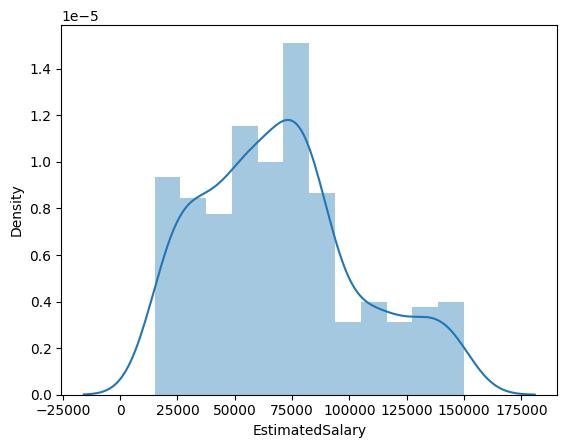

In [ ]:
# Distribusi Data
sns.distplot(wul["EstimatedSalary"])

In [ ]:
# Label Encoding
wul_categorical = wul.select_dtypes(exclude=[np.number]) # Memilih kolom-kolom kategorikal (non-numeric) dari DataFrame 'df1' dan menyimpannya dalam 'df1_categorical'.
wul_categorical.head() # menampilkan data df1_categorical

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [ ]:
data_column_category = wul.select_dtypes(exclude=[np.number]).columns # Mengambil nama kolom-kolom dengan tipe data bukan numerik (kategorikal)

In [ ]:
# Mengimpor LabelEncoder dari sklearn.preprocessing.
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder.
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom-kolom kategorikal menjadi numerik.
for i in data_column_category:
    wul[i] = label_encoder.fit_transform(wul[i])

# Menampilkan hasil data yang telah di-label encoding.
print('Label Encoded Data:')
wul.head()

Label Encoded Data:


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
wul['Gender'].replace({'Male':1, 'Female':0},inplace = True) #bisa juga dengan cara mengganti seperti ini
wul.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<Axes: >

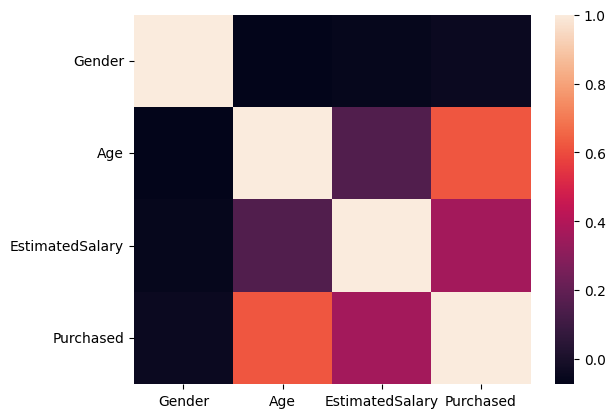

In [ ]:
# Correlation Matrix
corr = wul.corr()
sns.heatmap(corr)

### Split Data

In [ ]:
#Split data into dependent/independent variables X
X = wul[['Age','EstimatedSalary']].values
y = wul.iloc[:, -1].values #kolom purchased atau pembelian

In [ ]:
#Split data into test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
X_train.shape, X_test.shape

((300, 2), (100, 2))

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale Dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predict Result/ Score Model

In [ ]:
#Prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len (y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


### Evaluasi Model

In [ ]:
#Accuracy
accuracy_score (y_test, y_pred)

0.86

In [ ]:
#Classification report
print(f'Classification Report: \n{classification_report (y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [ ]:
#F1 score
print(f"Fl Score: {f1_score (y_test, y_pred)}")

Fl Score: 0.8333333333333334


<Axes: >

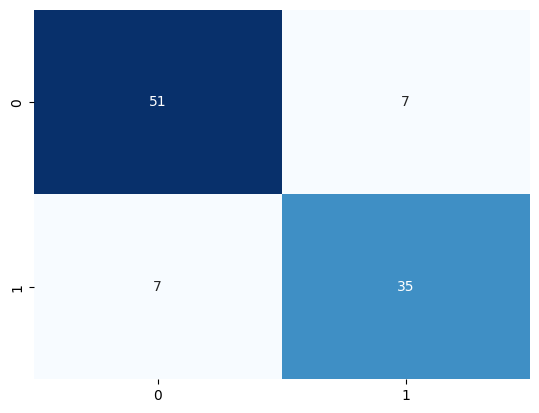

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

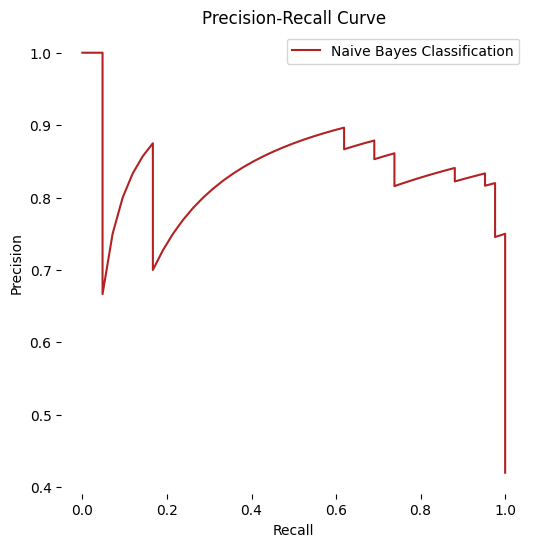

In [ ]:
#Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve (y_test, y_pred_proba)

fig, ax = plt.subplots (figsize=(6,6))
ax.plot (recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

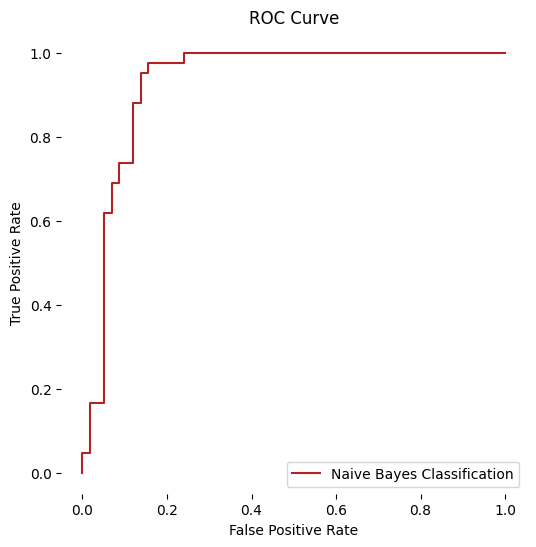

In [ ]:
#Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)
fig, ax = plt.subplots (figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Visualization Predictions

<ipython-input-597-4507077b244c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


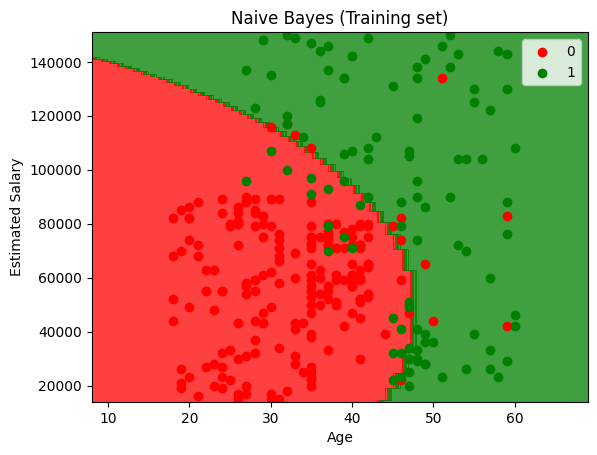

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-598-d8c11ec0d50a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


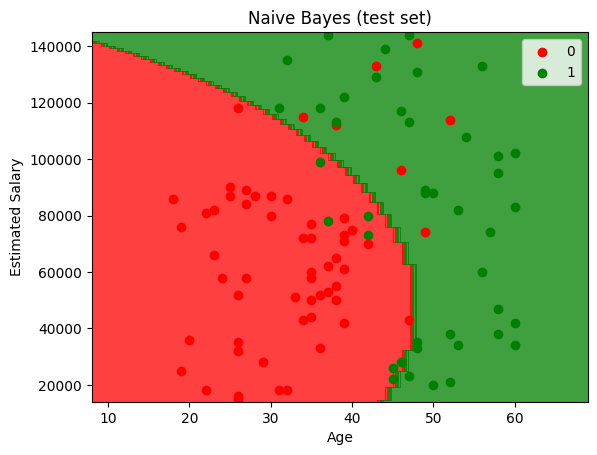

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Predict purchase with Age (45) and Salary (97000)
print(classifier.predict(sc.transform([[45, 97000]])))

[1]


## Implementasi Klasifikasi Support Vector Machine(SVM)

### Import Libraries

In [ ]:
from sklearn.svm import SVC

### Import Data

In [ ]:
wul2 = pd.read_csv(('/content/drive/MyDrive/Semester 5/Social_Network_Ads.csv'))
wul2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Analysis/Preprocessing

In [ ]:
#Drop data
wul2 = wul2.drop(['User ID'], axis = 1) #menghapus kolom User ID
wul2.head() #menampilkan 5 data teratas

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
#Deskripsi Data
wul2.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<ipython-input-604-8821ef0f3bdc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wul2["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

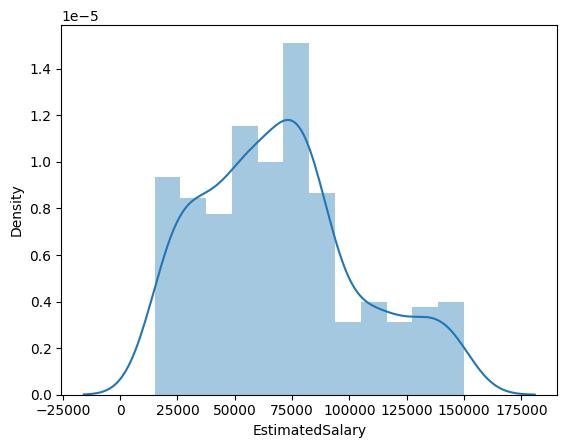

In [ ]:
#Distribusi Data
sns.distplot(wul2["EstimatedSalary"])

In [ ]:
#Label Encoding
wul2['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
wul2['Gender'].replace({'Male':1, 'Female':0},inplace = True) #bisa juga dengan cara mengganti seperti ini
wul2.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<Axes: >

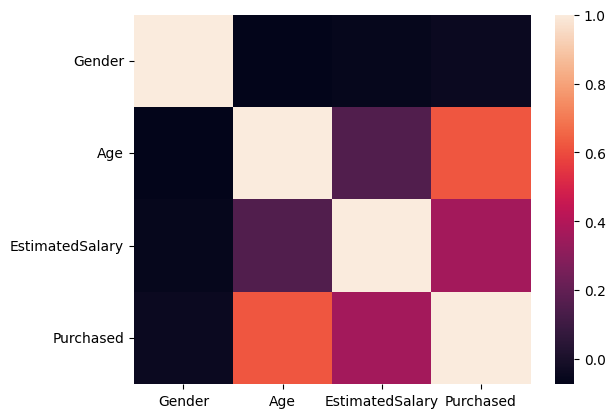

In [ ]:
#Correlation Matrix
corr = wul2.corr()
sns.heatmap(corr)

### Split Data

In [ ]:
# Split data into dependent/independent variables
X = wul2[['Age','EstimatedSalary']].values
y = wul2.iloc[:, -1].values

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((300, 2), (100, 2))

### Feature Scaling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predict Result / Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


### Model Evaluation

In [ ]:
#Accuracy
acc = accuracy_score(y_pred, y_test)
acc

0.82

In [ ]:
#Classification Report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.83      0.71      0.77        42

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [ ]:
#F1 Score
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.7692307692307692


<Axes: >

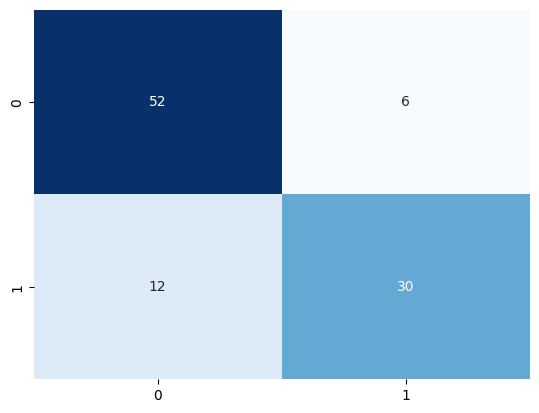

In [ ]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

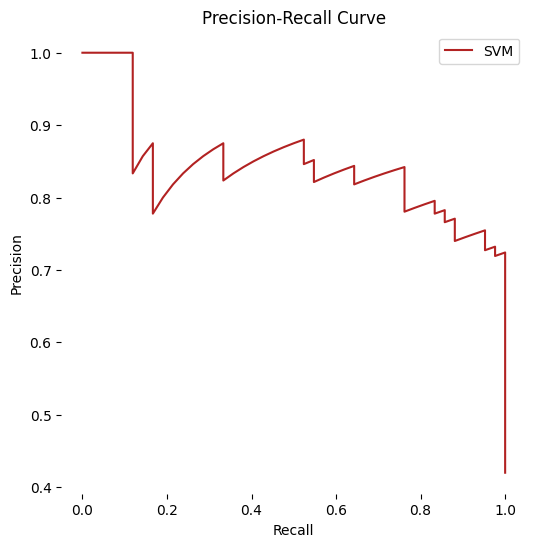

In [ ]:
#Precision-Recall Curve Plot
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

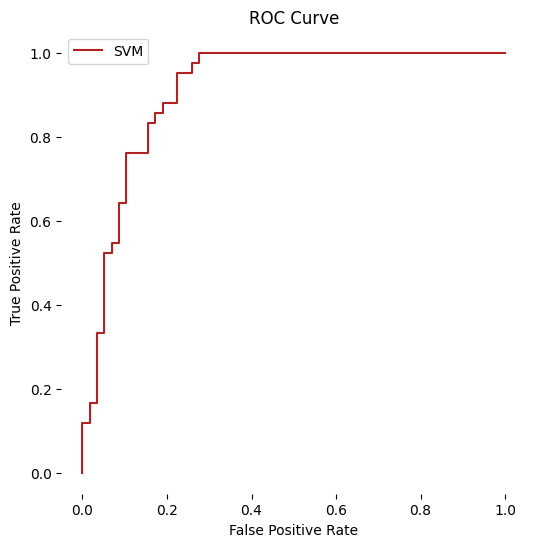

In [ ]:
#AUC/ROC Curve Plot
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Visualization Predictions

<ipython-input-618-ae93a1145478>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


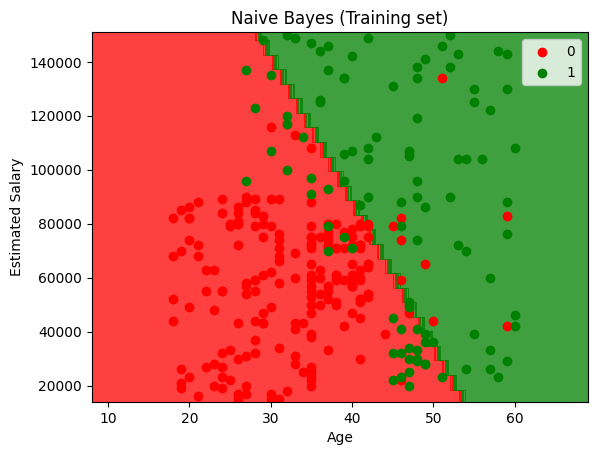

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-619-825d83842205>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


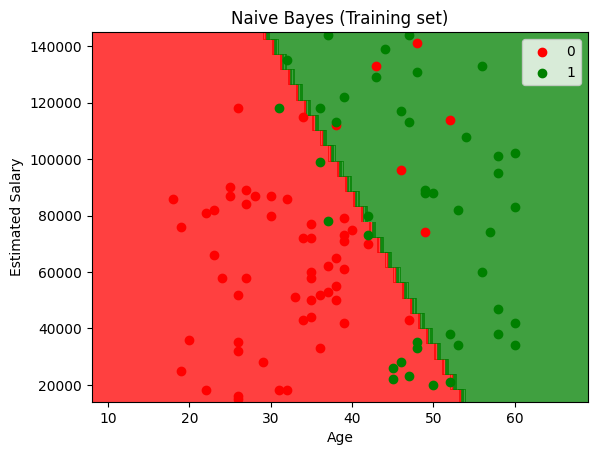

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Example
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Dataset 2 (Student_bucketing.csv)

#### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #import dataset dari gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ds2 = pd.read_csv('/content/drive/MyDrive/Semester 5/Student_bucketing.csv') #import dataset
ds2.head() # menampilkan 5 data teratas

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


#### Data Analysis/Preprocessing

In [ ]:
# Drop Data
ds2 = ds2.drop(['Student_id'], axis = 1) #menghapus kolom yang tidak digunakan
ds2.head() #menampilkan 5 data teratas

,Age,Grade,Employed,marks
0,19,1st Class,yes,29
1,20,2nd Class,no,41
2,18,1st Class,no,57
3,21,2nd Class,no,29
4,19,1st Class,no,57


In [ ]:
# Deskripsi Data
ds2.describe() #deskripsi data

,Age,marks
count,232.000000,232.000000
mean,19.896552,58.689655
std,1.030944,23.200580
min,18.000000,20.000000
25%,19.000000,37.000000
50%,20.000000,59.500000
75%,21.000000,77.000000
max,22.000000,98.000000


<ipython-input-625-8be7f3ea4df0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds2["marks"])


<Axes: xlabel='marks', ylabel='Density'>

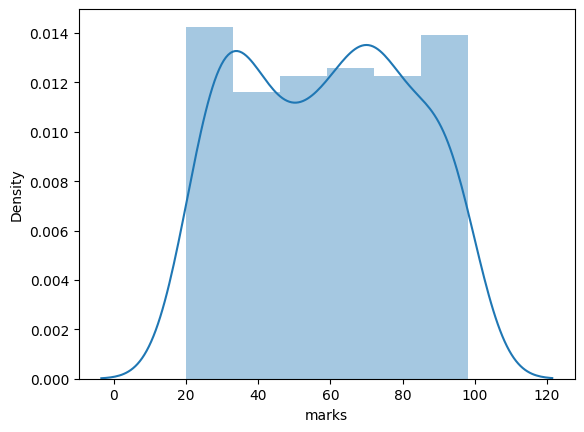

In [ ]:
# Distribusi Data
sns.distplot(ds2["marks"])

In [ ]:
# Label Encoding
ds2_categorical = ds2.select_dtypes(exclude=[np.number]) # Memilih kolom-kolom kategorikal (non-numeric) dari DataFrame 'df1' dan menyimpannya dalam 'df1_categorical'.
ds2_categorical.head() # menampilkan data df1_categorical

,Grade,Employed
0,1st Class,yes
1,2nd Class,no
2,1st Class,no
3,2nd Class,no
4,1st Class,no


In [ ]:
data_column_category = ds2.select_dtypes(exclude=[np.number]).columns
# Mengambil nama kolom-kolom dengan tipe data bukan numerik (kategorikal)

In [ ]:
# Mengimpor LabelEncoder dari sklearn.preprocessing.
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder.
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom-kolom kategorikal menjadi numerik.
for i in data_column_category:
    ds2[i] = label_encoder.fit_transform(ds2[i])

# Menampilkan hasil data yang telah di-label encoding.
print('Label Encoded Data:')
ds2.head(10)

Label Encoded Data:


,Age,Grade,Employed,marks
0,19,0,1,29
1,20,1,0,41
2,18,0,0,57
3,21,1,0,29
4,19,0,0,57
5,20,1,1,53
6,19,2,1,78
7,21,2,1,70
8,22,2,1,97
9,21,0,0,58


<Axes: >

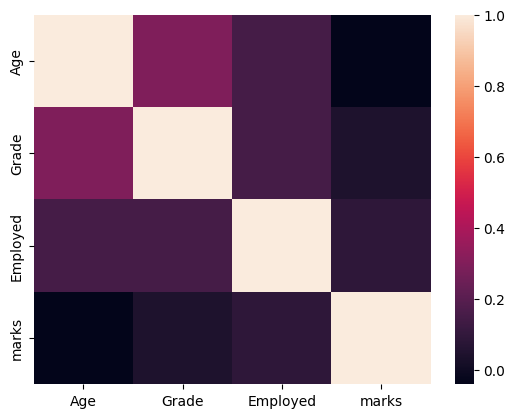

In [ ]:
# Correlation Matrix
corr = ds2.corr()
sns.heatmap(corr)

#### Split Data

In [ ]:
#Split data into dependent/independent variables X
X = ds2[['Age','marks']].values
y = ds2.iloc[:, 2].values #kolom purchased atau pembelian

In [ ]:
#Split data into test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
X_train.shape, X_test.shape

((174, 2), (58, 2))

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale Dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train Model

In [ ]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Predict Result/Score Model

In [ ]:
#Prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len (y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]]


#### Evaluasi Model

In [ ]:
#Accuracy
accuracy_score (y_test, y_pred)

0.603448275862069

In [ ]:
#Classification report
print(f'Classification Report: \n{classification_report (y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.85      0.72        34
           1       0.55      0.25      0.34        24

    accuracy                           0.60        58
   macro avg       0.58      0.55      0.53        58
weighted avg       0.59      0.60      0.56        58



In [ ]:
#F1 score
print(f"Fl Score: {f1_score (y_test, y_pred)}")

Fl Score: 0.34285714285714286


<Axes: >

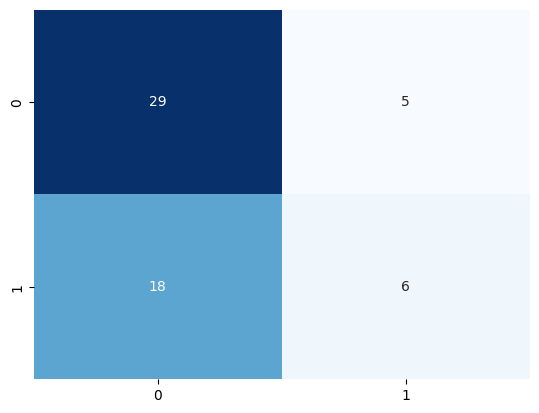

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

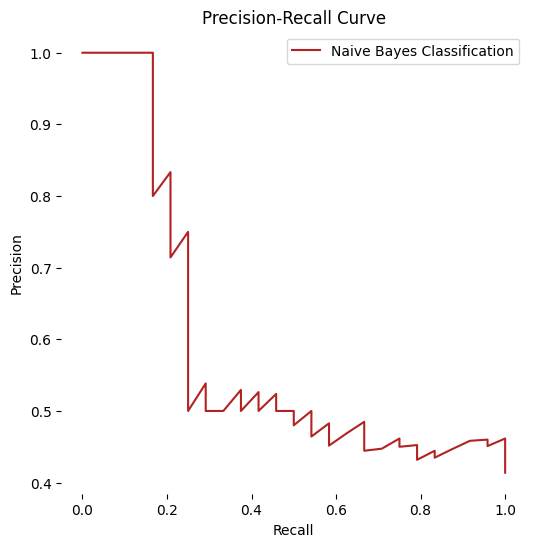

In [ ]:
#Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve (y_test, y_pred_proba)

fig, ax = plt.subplots (figsize=(6,6))
ax.plot (recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

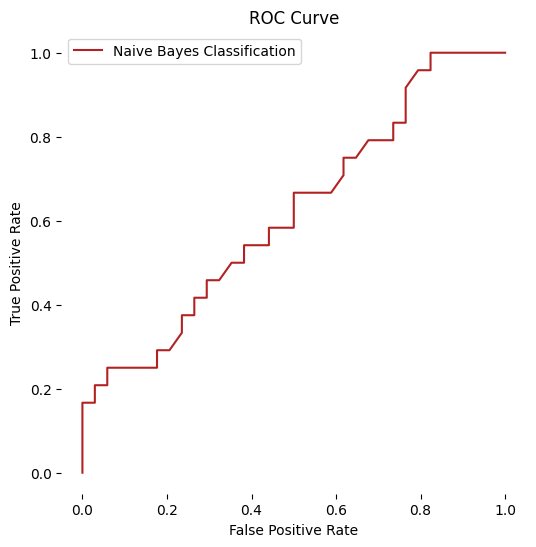

In [ ]:
#Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)
fig, ax = plt.subplots (figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-642-8b16916064af>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


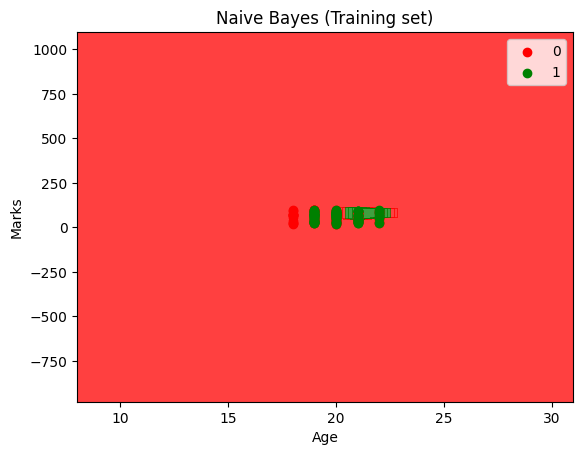

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Marks')
plt.legend()
plt.show()

<ipython-input-643-0bce5c034afb>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


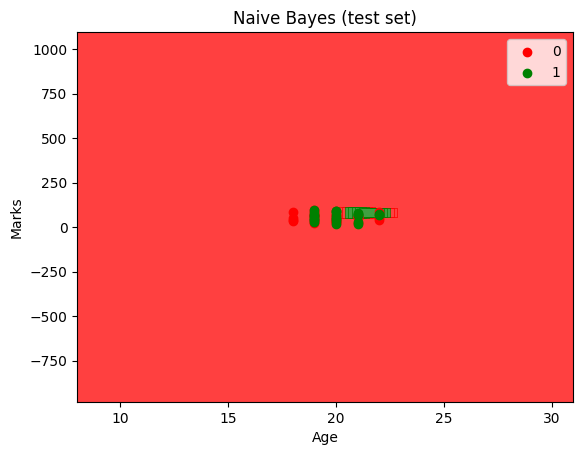

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [ ]:
#Predict purchase with Age (20) and Marks (46)
print(classifier.predict(sc.transform([[20, 46]])))

[0]


#### Train Model

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### Predict Result/ Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]]


#### Model Evaluation

In [ ]:
#Accuracy
acc = accuracy_score(y_pred, y_test)
acc

0.5862068965517241

In [ ]:
#Classification Report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        34
           1       0.00      0.00      0.00        24

    accuracy                           0.59        58
   macro avg       0.29      0.50      0.37        58
weighted avg       0.34      0.59      0.43        58



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#F1 Score
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.0


<Axes: >

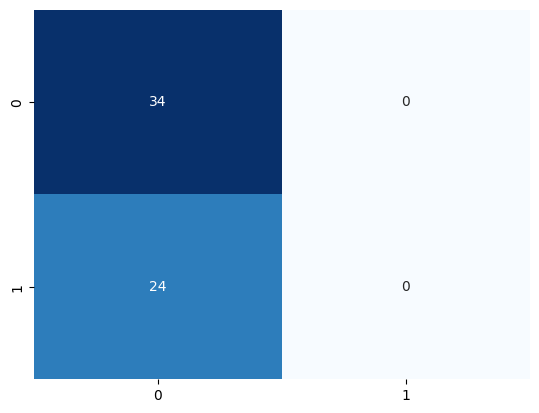

In [ ]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

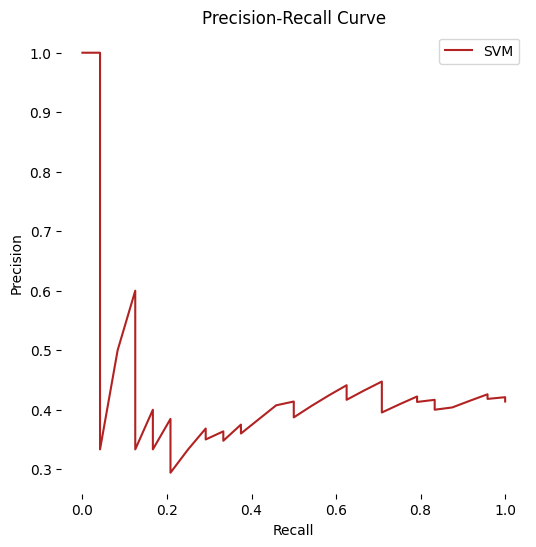

In [ ]:
#Precision-Recall Curve Plot
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

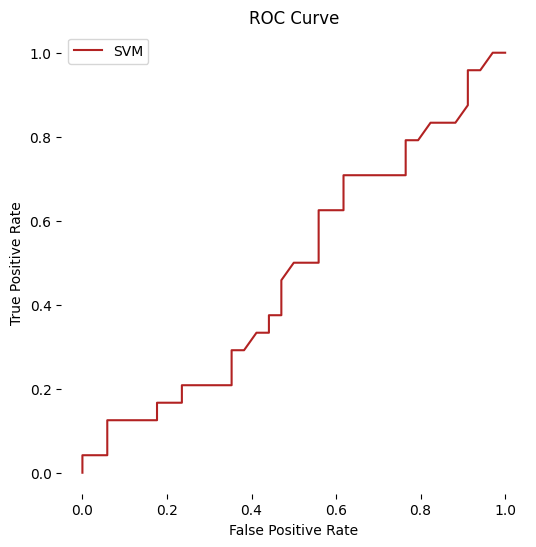

In [ ]:
#AUC/ROC Curve Plot
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-653-dc074545b611>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


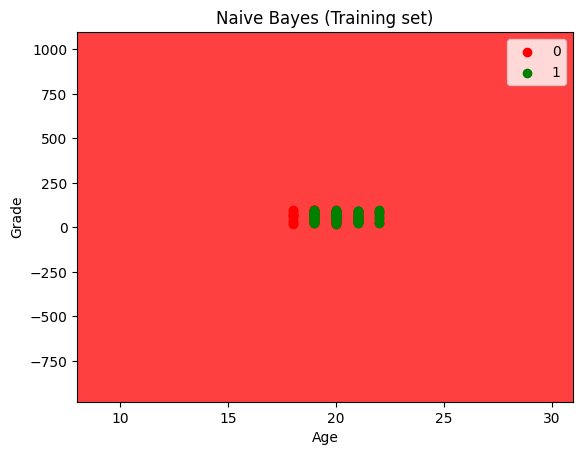

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

<ipython-input-654-92a8b4d70bc6>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


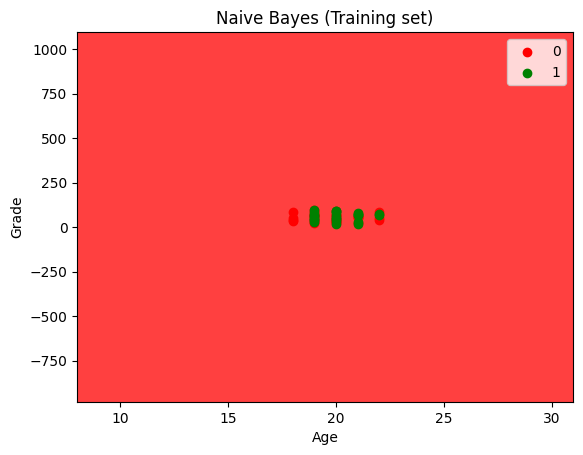

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [ ]:
#Predict purchase with Age (18) and Marks(57)
print(classifier.predict(sc.transform([[18, 57]])))

[0]


## Dataset 3 (diabetes_RS1.csv)

#### Import Dataset

In [ ]:
ds3 = pd.read_csv('/content/drive/MyDrive/Semester 5/diabetes_RS1.csv') #import dataset
ds3.head() # menampilkan 5 data teratas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Analysis/Preprocessing

In [ ]:
# Drop Data
ds3 = ds3.drop(['Pregnancies','Glucose','SkinThickness','Insulin',
                'BMI','DiabetesPedigreeFunction'], axis = 1) #menghapus kolom User ID
ds3.head() #menampilkan 5 data teratas

,BloodPressure,Age,Outcome
0,72,50,1
1,66,31,0
2,64,32,1
3,66,21,0
4,40,33,1


In [ ]:
# Deskripsi Data
ds3.describe() #deskripsi data

,BloodPressure,Age,Outcome
count,768.000000,768.000000,768.000000
mean,69.105469,33.240885,0.348958
std,19.355807,11.760232,0.476951
min,0.000000,21.000000,0.000000
25%,62.000000,24.000000,0.000000
50%,72.000000,29.000000,0.000000
75%,80.000000,41.000000,1.000000
max,122.000000,81.000000,1.000000


<ipython-input-659-dd5221e60648>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds3["BloodPressure"])


<Axes: xlabel='BloodPressure', ylabel='Density'>

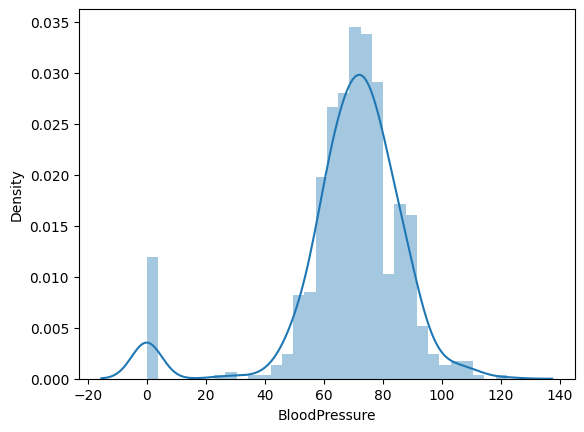

In [ ]:
# Distribusi Data
sns.distplot(ds3["BloodPressure"])

<Axes: >

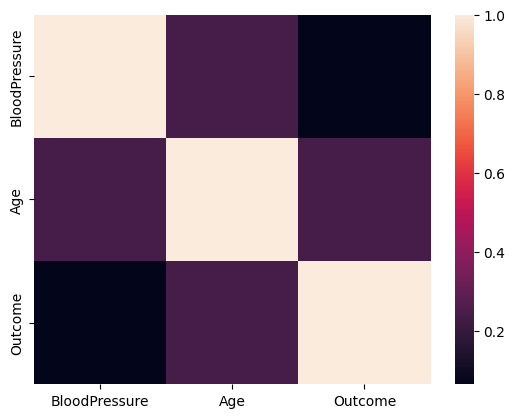

In [ ]:
# Correlation Matrix
corr = ds3.corr()
sns.heatmap(corr)

#### Split Data

In [ ]:
#Split data into dependent/independent variables X
X = ds3[['Age','BloodPressure']].values
y = ds3.iloc[:, -1].values #kolom purchased atau pembelian

In [ ]:
#Split data into test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
X_train.shape, X_test.shape

((576, 2), (192, 2))

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale Dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train Model

In [ ]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Predict Result/Score Model

In [ ]:
#Prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len (y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]

#### Evaluasi Model

In [ ]:
#Accuracy
accuracy_score (y_test, y_pred)

0.59375

In [ ]:
#Classification report
print(f'Classification Report: \n{classification_report (y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       123
           1       0.29      0.09      0.13        69

    accuracy                           0.59       192
   macro avg       0.46      0.48      0.43       192
weighted avg       0.51      0.59      0.52       192



In [ ]:
#F1 score
print(f"Fl Score: {f1_score (y_test, y_pred)}")

Fl Score: 0.13333333333333333


<Axes: >

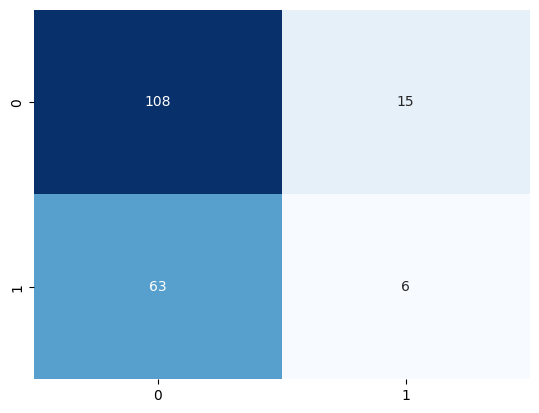

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

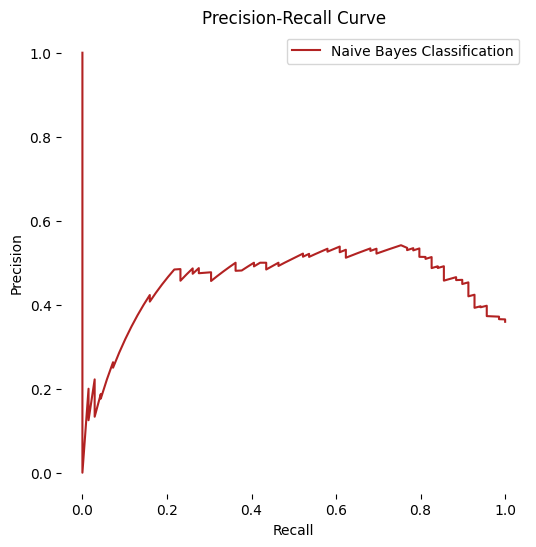

In [ ]:
#Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve (y_test, y_pred_proba)

fig, ax = plt.subplots (figsize=(6,6))
ax.plot (recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

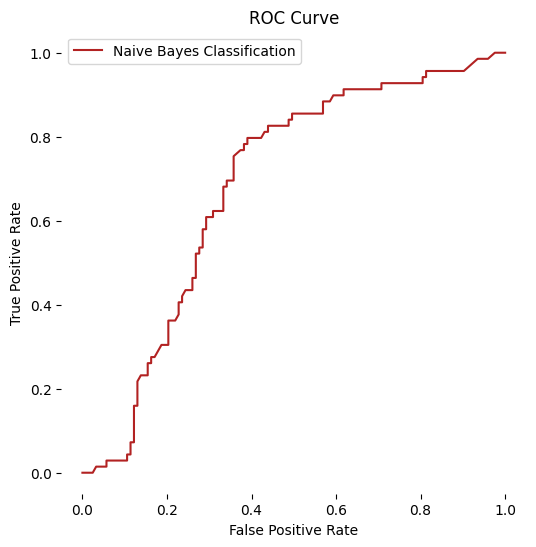

In [ ]:
#Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)
fig, ax = plt.subplots (figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-673-73c90ad4f0ae>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


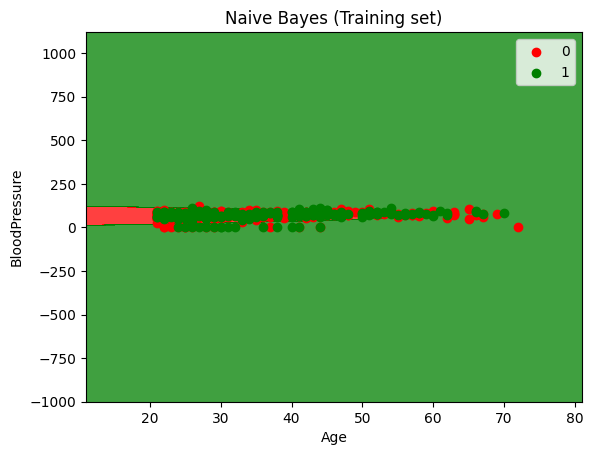

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

<ipython-input-674-2ebf63bf723d>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


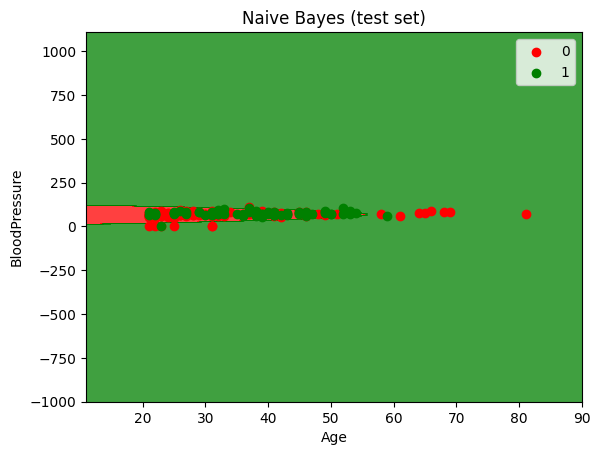

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

In [ ]:
#Predict purchase with Age (50) and BloodPressure (72)
print(classifier.predict(sc.transform([[66, 31]])))

[1]


#### Train Model

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### Predict Result/Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]

#### Model Evaluation

In [ ]:
#Accuracy
acc = accuracy_score(y_pred, y_test)
acc

0.640625

In [ ]:
#Classification Report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       123
           1       0.00      0.00      0.00        69

    accuracy                           0.64       192
   macro avg       0.32      0.50      0.39       192
weighted avg       0.41      0.64      0.50       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#F1 Score
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.0


<Axes: >

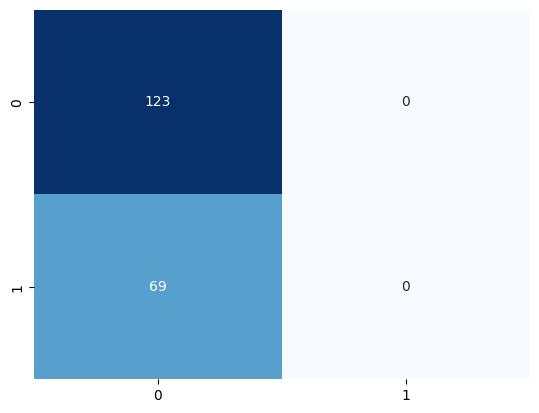

In [ ]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

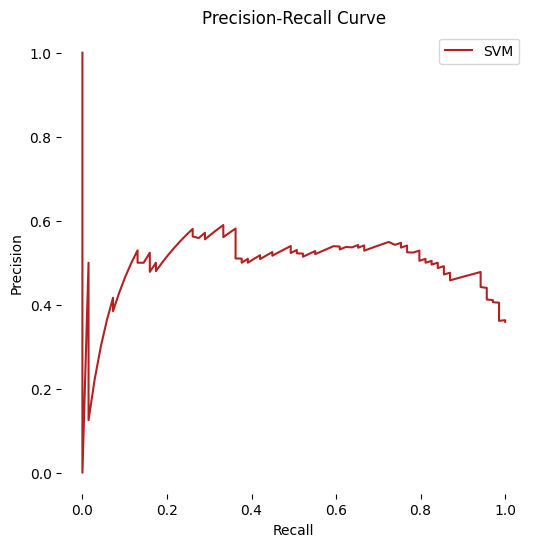

In [ ]:
#Precision-Recall Curve Plot
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

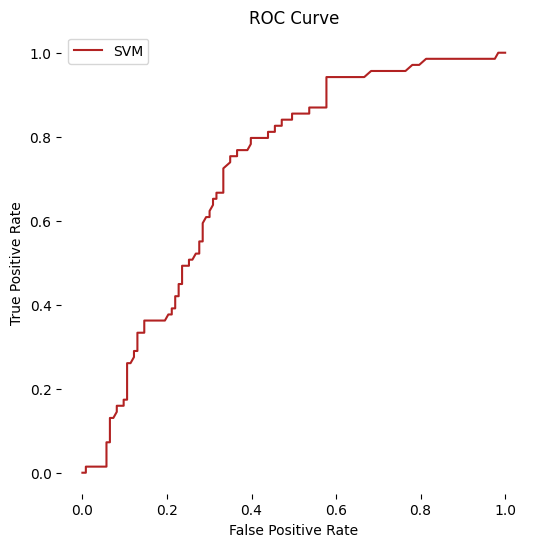

In [ ]:
#AUC/ROC Curve Plot
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-684-dc074545b611>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


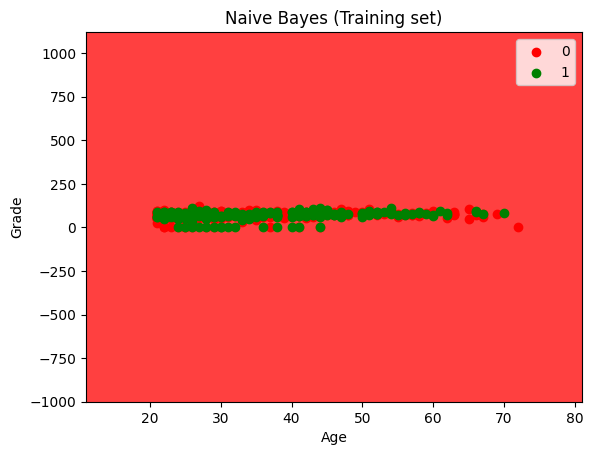

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

<ipython-input-685-92a8b4d70bc6>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


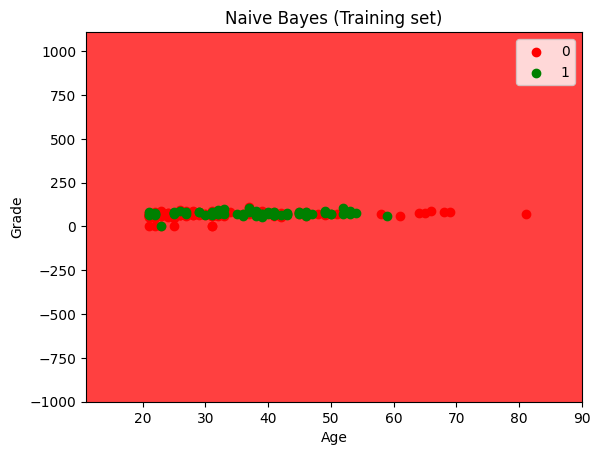

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [ ]:
#Predict purchase with Age (50) and BloodPressure (72)
print(classifier.predict(sc.transform([[66, 31]])))

[0]
